# White Noise

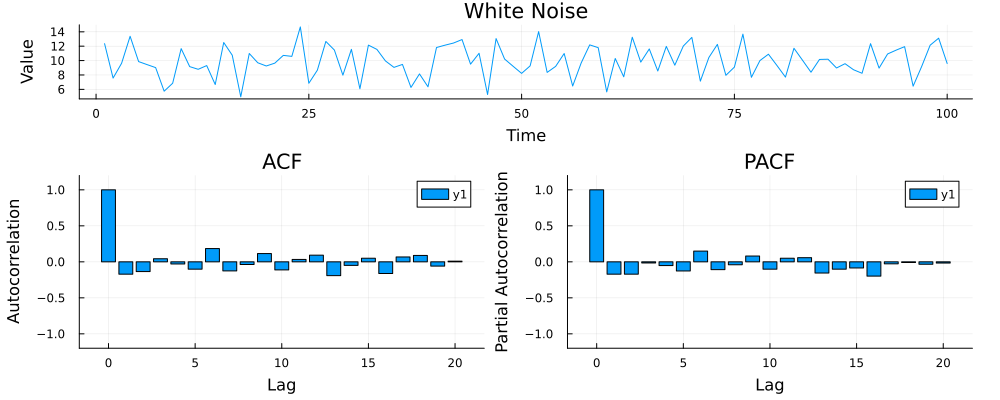

In [39]:
using TimeSeriesKit
using StatsBase
using Plots

# Model White Noise
wn = WhiteNoise(100; mean=10, variance=5.0)
plot_acf_pacf(wn)

Pacf input vals: [10.0, 0.5112744617202103, 8.683587852938842, 3.558683489436334, 7.798293523587932, 3.802811793811322, 7.419165489743349, 4.406763973750291, 6.966480232944637, 3.862811693077492, 8.25998800420708, 2.6192476855994213, 8.59651609820091, 3.1859915700914154, 8.137608721593654, 3.142089899844098, 6.653928925421497, 3.9640475203656718, 6.49326145875658, 5.5074216553728865, 3.651159219973257, 5.219639590447542, 6.486500521573122, 4.4989536012461455, 5.97825052659325, 5.365141748990734, 5.632057440129654, 5.629340735686487, 5.774179346286179, 4.892181027414074, 4.09067953065159, 7.679764450927184, 4.054985794550896, 7.776585618203983, 5.113349864282525, 6.4853251457720775, 3.9448450974179528, 5.321188082650921, 6.1874505422735435, 4.143966691029131, 6.886602199235793, 4.442577541382665, 7.417860641268012, 3.401094248834176, 5.764645093860512, 5.144497711638549, 5.026646492383023, 4.691475327167356, 6.543552583971583, 5.291103394595154, 5.770769294176211, 5.0390732132750635, 3.

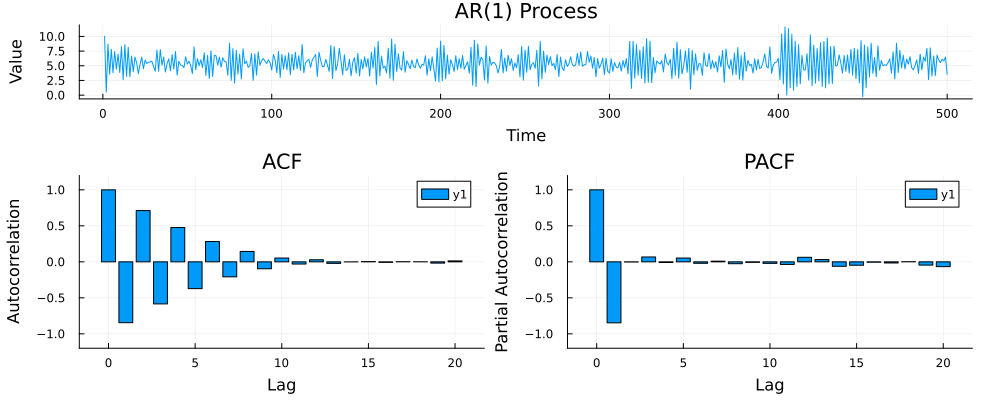

In [3]:
ts = ARProcess(500, phi=0.85, constant=10.0)
plot_acf_pacf(ts)

# Stationary AR Process

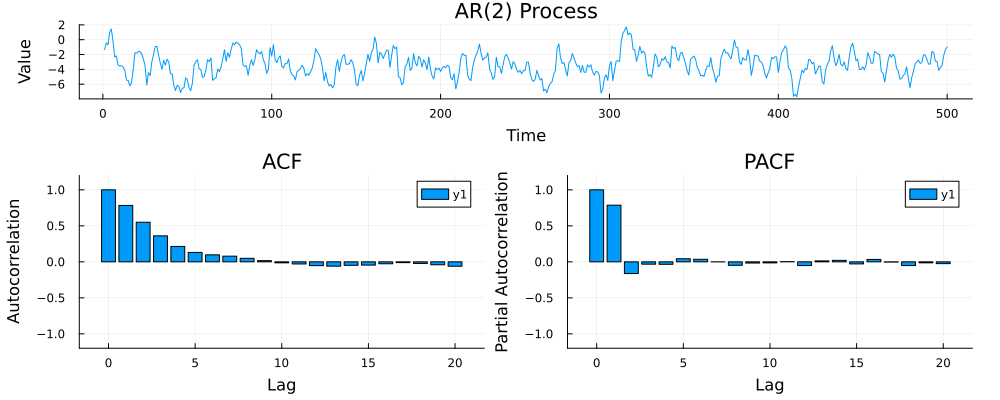

In [ ]:
# AR(2) process: φ1 = 0.9, φ2 = -0.2, constant = -2.0 → X_t = -1.0 + 0.9*X_{t-1} - 0.2*X_{t-2} + ε_t
# Characteristic polynomial: 1 - 0.9*z + 0.2*z^2
# Roots: z1 = 2.5, z2 = 2.0 (both > 1)
# ⇒ process is stationary

ts = ARProcess(500, phi=[0.9, -0.2], constant=-1.0)
plot_acf_pacf(ts)

We can see that AR(2) has two significant lags in the PACF plot.

# MA Process

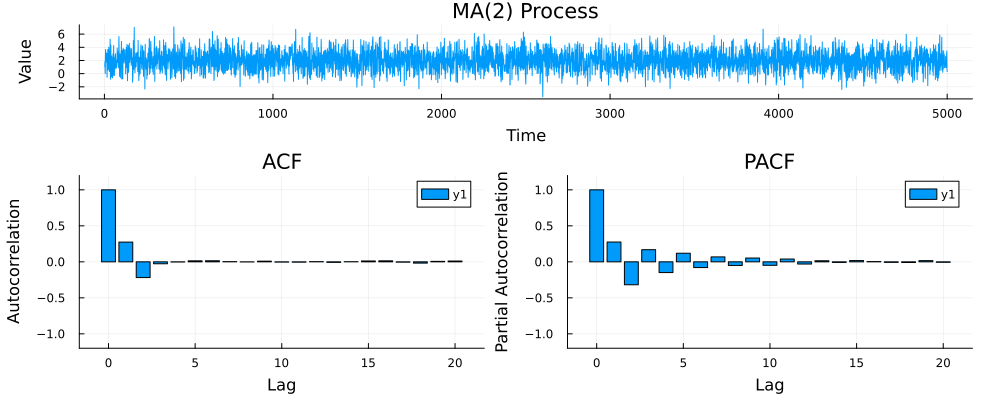

In [59]:
ts = MAProcess(5000, theta=[0.9, -0.4], mean=2.0)
plot_acf_pacf(ts, lags=20)

# Integration of White Noise

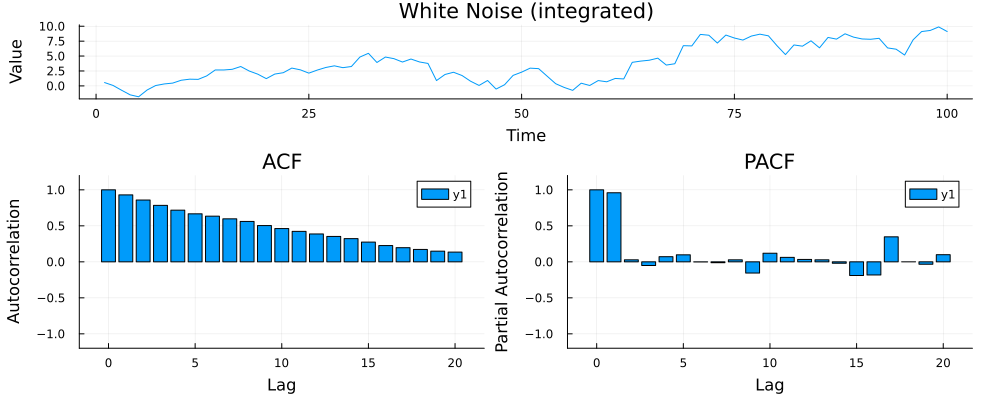

In [60]:
# Integrate White Noise to get Random Walk
# i.e., X_t = ε_t → Y_t = Σ ε_i = ε_t + ε_{t-1} + ... + ε_1 = ε_t  + Y_{t-1}
ts = WhiteNoise(100; mean=0, variance=1.0)
ts_int = integrate(ts)
plot_acf_pacf(ts_int)

# Differentiation of Random Walk

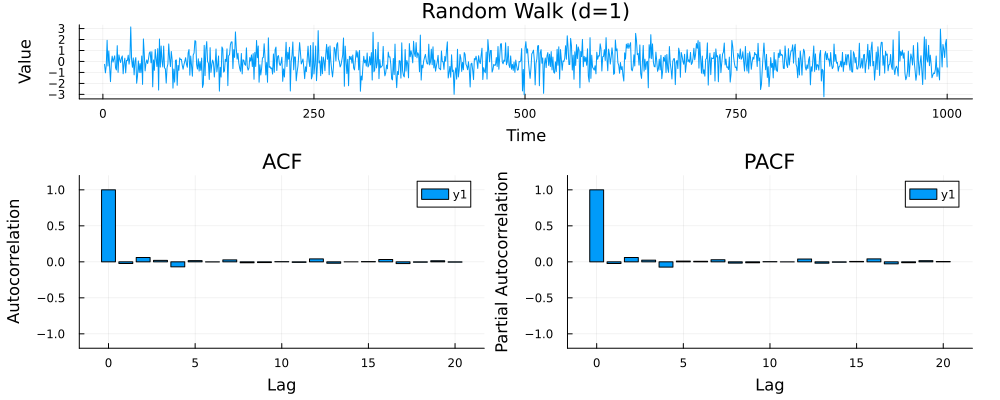

In [64]:
# Differentiate Random Walk to get White Noise
# i.e., X_t = X_{t-1} + ε_t → Y_t = X_t - X_{t-1} = X_{t-1} + ε_t - X_{t-1} = ε_t
rw = RandomWalk(1000; variance=1.0)
ts_diff = differentiate(rw)
plot_acf_pacf(ts_diff)